<h1>Peak distances in a HEK293 polysome profile</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from polan import find_poly_peaks, fit_peaks
def normpdf(x,mu,sigma):
    return 1/(np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-1 * ((x - mu) ** 2 / (2 * sigma ** 2)))

In [2]:
#read in the data file containing the HEK293 polysome profile
HEK_trace = pd.read_csv('Data/poly_yeast.csv')
#ensure that data are in ascending x axis order
HEK_trace = HEK_trace.sort_values('x')
#normalise x axis 
HEK_trace.x = HEK_trace.x / max(HEK_trace.x)
#detect well separated peaks
autopeaks_H = np.asarray(find_poly_peaks(HEK_trace))
#extrapolate additional peaks up to gradient end at 0.99. Use a SSU/ polysome ration of 0.37.
extrapeaks_H,peakfun_H = fit_peaks(autopeaks_H,0.99,mode=0.37)

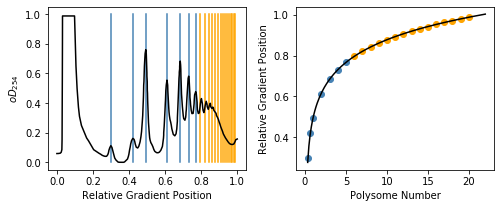

In [3]:
plt.close()
fig,ax = plt.subplots(1,2,figsize=(8,3))

#plot the fitted peakpositions onto the polysome trace
for peak in autopeaks_H:
    ax[0].plot([peak,peak],[0,1],c='steelblue')
for peak in extrapeaks_H:
    ax[0].plot([peak,peak],[0,1],c='orange')
ax[0].plot(HEK_trace.x,HEK_trace.y,c='black')
ax[0].set_ylabel(r'$oD_{254}$')
ax[0].set_xlabel('Relative Gradient Position')

#plot the fitted peaks against the polysome number
x_auto_H = [0.34,1-0.34] + list(range(1,len(autopeaks_H)-1))
x_extra_H = list(range(len(autopeaks_H) - 1,len(autopeaks_H) + len(extrapeaks_H) - 1))

ax[1].plot(peakfun_H[0], peakfun_H[1], c='black')
ax[1].scatter(x_auto_H, autopeaks_H, color='steelblue')
ax[1].scatter(x_extra_H, extrapeaks_H, color='orange')
ax[1].set_xlabel('Polysome Number')
ax[1].set_ylabel('Relative Gradient Position')

fig.subplots_adjust(wspace=0.25)

#plt.savefig('Supp Figure 2.svg')

plt.show()